In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import tensorflow as tf
from tensorflow import keras
import os
from PIL import Image
import cv2
import pathlib

# Import Dataset

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

data_dir = keras.utils.get_file(fname='flower_dataset',
                                origin=dataset_url,
                                cache_dir = '.',
                                untar=True
                                )

In [ ]:
type(data_dir), data_dir

(str, './datasets/flower_dataset')

In [ ]:
flower_dir = pathlib.Path(data_dir + '/flower_photos')
type(flower_dir), flower_dir
# When you convert data_dir to a pathlib.Path object,
# you gain the flexibility and power of the pathlib module to work with the file system

(pathlib.PosixPath, PosixPath('datasets/flower_dataset/flower_photos'))

#  Data Exploration

In [ ]:
flower_dir.glob('*/*.jpg')  # an object of paths of all images in each sub-dir

<generator object Path.glob at 0x7a5f2181bde0>

In [ ]:
flower_paths = list(flower_dir.glob('*/*.jpg')) # turns an object into a list containing paths
flower_paths[:5]

[PosixPath('datasets/flower_dataset/flower_photos/tulips/14073608876_49db8ac97d_n.jpg'),
 PosixPath('datasets/flower_dataset/flower_photos/tulips/16680998737_6f6225fe36.jpg'),
 PosixPath('datasets/flower_dataset/flower_photos/tulips/14487705209_ea723109e1_m.jpg'),
 PosixPath('datasets/flower_dataset/flower_photos/tulips/13999402743_f563f6b685_n.jpg'),
 PosixPath('datasets/flower_dataset/flower_photos/tulips/13510057763_01b832d919.jpg')]

In [ ]:
flower_paths = {
    'roses': list(flower_dir.glob('roses/*.jpg')),
    'daisy': list(flower_dir.glob('daisy/*.jpg')),
    'dandelion': list(flower_dir.glob('dandelion/*.jpg')),
    'sunflowers': list(flower_dir.glob('sunflowers/*.jpg')),
    'tulips': list(flower_dir.glob('tulips/*.jpg')),
}

In [ ]:
for i in flower_paths.keys():
    print('{:<11}: {}'.format(i, len(flower_paths[i])))

roses      : 641
daisy      : 633
dandelion  : 898
sunflowers : 699
tulips     : 799


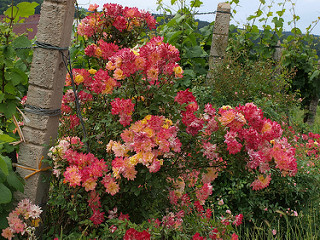

In [ ]:
im = Image.open(str(flower_paths['roses'][2]))  # converts type from WindowsPath to str
im

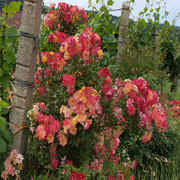

In [ ]:
im.resize(size=(180, 180))

In [ ]:
for i in flower_paths.keys():
    for j in range(2):
        print(cv2.imread(str(flower_paths[i][j])).shape)  # images have different shapes

(240, 225, 3)
(328, 500, 3)
(240, 320, 3)
(208, 320, 3)
(223, 240, 3)
(256, 320, 3)
(213, 320, 3)
(333, 500, 3)
(213, 320, 3)
(333, 500, 3)


# Data Preprocessing

In [ ]:
labels = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [ ]:
X = []  # contains arrays
Y = []  # contains label for each flower

for flower_type, paths in flower_paths.items():
    for path in paths:
        arr = cv2.imread(str(path))
        resized_arr = cv2.resize(arr, (180, 180))
        X.append(resized_arr)
        Y.append(labels[flower_type])

In [ ]:
X = np.array(X)
Y = np.array(Y)
X.shape, Y.shape

((3670, 180, 180, 3), (3670,))

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify=Y)  # split dataset to train and test set

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, stratify=Y_train) # split train set to train set and validation set

Y_train.shape, Y_val.shape, Y_test.shape

((2972,), (331,), (367,))

In [ ]:
np.unique(Y_train, return_counts=True)

(array([0, 1, 2, 3, 4]), array([519, 513, 727, 566, 647]))

- The class is just slightly imbalanced for training set but I think that's okay

In [ ]:
np.unique(Y_val, return_counts=True)

(array([0, 1, 2, 3, 4]), array([58, 57, 81, 63, 72]))

In [ ]:
np.unique(Y_test, return_counts=True)

(array([0, 1, 2, 3, 4]), array([64, 63, 90, 70, 80]))

In [ ]:
X_train_scaled = X_train / 255
X_val_scaled = X_val / 255
X_test_scaled = X_test / 255

# Training

### Without Augmentation

In [ ]:
Model_without_Augmenter = keras.Sequential([
    # CNN
    keras.layers.Input(shape=(180, 180, 3)),
    keras.layers.Conv2D(filters=18, kernel_size=(3,3), padding='same', activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    keras.layers.Conv2D(filters=36, kernel_size=(3,3), padding='same', activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    keras.layers.Conv2D(filters=72, kernel_size=(3,3), padding='same', activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    # NN
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(5, activation='softmax')
])

Model_without_Augmenter.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 180, 180, 18)        │             504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 18)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 36)          │           5,868 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 36)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 72)          │          23,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 72)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 34848)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,460,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,491,089 (17.13 MB)

 Trainable params: 4,491,089 (17.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
Model_without_Augmenter.compile(
    optimizer='adam',
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
    )

Model_without_Augmenter.fit(X_train_scaled, Y_train, batch_size=64, epochs=40, validation_data=(X_val_scaled, Y_val))

Epoch 1/40
47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 164ms/step - accuracy: 0.3361 - loss: 1.5663 - val_accuracy: 0.5710 - val_loss: 1.0660
Epoch 2/40
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.5572 - loss: 1.1225 - val_accuracy: 0.6284 - val_loss: 0.9794
Epoch 3/40
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.6319 - loss: 0.9746 - val_accuracy: 0.5619 - val_loss: 1.0940
Epoch 4/40
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.6856 - loss: 0.8097 - val_accuracy: 0.6254 - val_loss: 0.9834
Epoch 5/40
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7627 - loss: 0.6350 - val_accuracy: 0.6344 - val_loss: 0.9704
Epoch 6/40
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.8400 - loss: 0.4595 - val_accuracy: 0.6193 - val_loss: 1.1688
Epoch 7/40
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.8972 - loss: 0.3062 - val_accuracy: 0.6254 - val_loss: 1.2785
Epoch 8/40
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.9369 - loss: 0.2080 - val_accuracy: 0.6435 

In [ ]:
Model_without_Augmenter.evaluate(X_test_scaled, Y_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.6444 - loss: 2.5305


[2.791633367538452, 0.6376021504402161]

The accuracy of training set is very high compared to the accuracy of validation set and test set --> Model is OVERFITTING!!!

In [ ]:
prob_1 = Model_without_Augmenter.predict(X_test_scaled)
Yp_test_1 = np.array([np.argmax(i) for i in prob_1])
Yp_test_1.shape

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step


(367,)

In [ ]:
cr_1 = classification_report(Y_test, Yp_test_1)

In [ ]:
cm_1 = confusion_matrix(Y_test, Yp_test_1)
display_cm1 = ConfusionMatrixDisplay(cm_1, display_labels=list(labels.keys()))

### Using Augmentation

https://keras.io/api/layers/preprocessing_layers

In [ ]:
augmenter = keras.Sequential()
augmenter.add(keras.layers.RandomZoom(height_factor=(-0.25, 0.25), width_factor=(-0.25, 0.25)))
augmenter.add(keras.layers.RandomFlip(mode='horizontal'))
augmenter.add(keras.layers.RandomRotation(factor=(-0.25, 0.25)))
augmenter.add(keras.layers.RandomContrast(factor=0.25))

In [ ]:
augmented_tensor = augmenter(X_train_scaled[:30])
augmented_tensor.shape

TensorShape([30, 180, 180, 3])

In [ ]:
augmented_arr = np.array(augmented_tensor[0])
augmented_arr.dtype

dtype('float32')

In [ ]:
def clip_image(image):
    if image.dtype == np.float32 or image.dtype == np.float64:
        return np.clip(image, 0.0, 1.0)

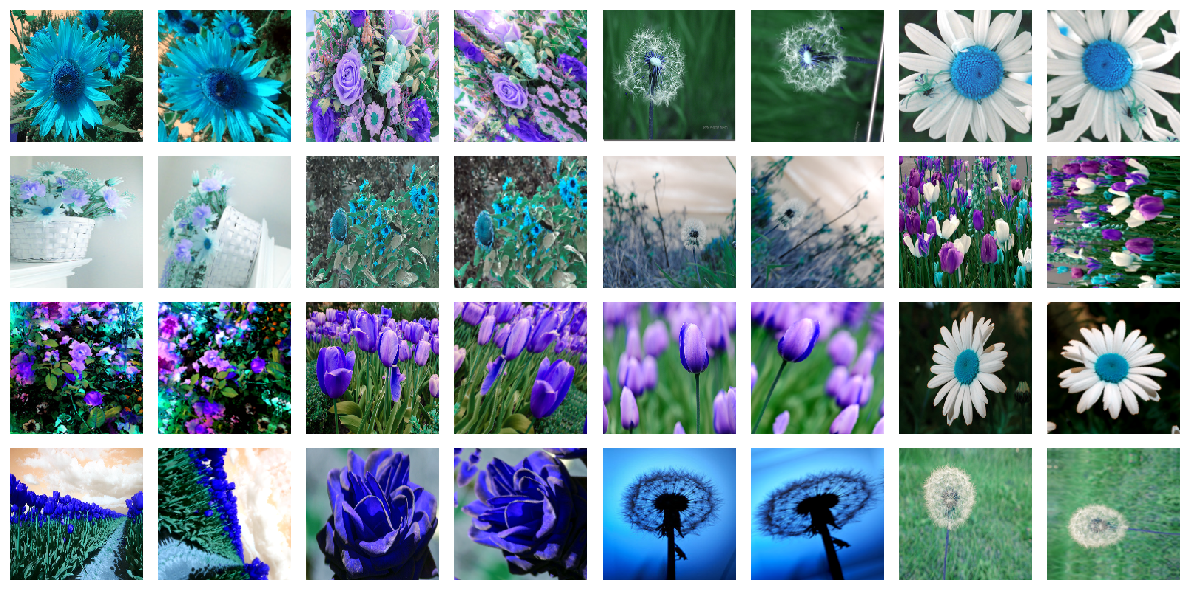

In [ ]:
fig, subs = plt.subplots(ncols=8, nrows=4, figsize=(12, 6))

images = []
for i in range(16):
    images.append(X_train_scaled[i+5])
    images.append(augmented_tensor[i+5])

for ax, img in zip(subs.flatten(), images):
    ax.matshow(clip_image(img))
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
Model_with_Augmenter = keras.Sequential([
    keras.layers.Input(shape=(180, 180, 3)),
    # Augment Layers
    augmenter,
    # CNN
    keras.layers.Conv2D(filters=18, kernel_size=(3,3), padding='same', activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    keras.layers.Conv2D(filters=36, kernel_size=(3,3), padding='same', activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    keras.layers.Conv2D(filters=72, kernel_size=(3,3), padding='same', activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    # NN
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(5, activation='softmax')
])

Model_with_Augmenter.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 180, 180, 18)        │             504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 90, 90, 18)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 90, 90, 36)          │           5,868 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 45, 45, 36)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 45, 45, 72)          │          23,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 22, 22, 72)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 34848)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       4,460,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,491,089 (17.13 MB)

 Trainable params: 4,491,089 (17.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
Model_with_Augmenter.compile(
    optimizer='adam',
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
    )

Model_with_Augmenter.fit(X_train_scaled, Y_train, batch_size=64, epochs=35, validation_data=(X_val_scaled, Y_val))

Epoch 1/35
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - accuracy: 0.3330 - loss: 1.4881 - val_accuracy: 0.4985 - val_loss: 1.1669
Epoch 2/35
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.5108 - loss: 1.1639 - val_accuracy: 0.6073 - val_loss: 1.0433
Epoch 3/35
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.5854 - loss: 1.0279 - val_accuracy: 0.6405 - val_loss: 0.9472
Epoch 4/35
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.6224 - loss: 0.9588 - val_accuracy: 0.6314 - val_loss: 0.9243
Epoch 5/35
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.6325 - loss: 0.9303 - val_accuracy: 0.6828 - val_loss: 0.8510
Epoch 6/35
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.6820 - loss: 0.8499 - val_accuracy: 0.6586 - val_loss: 0.8638
Epoch 7/35
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.6822 - loss: 0.8371 - val_accuracy: 0.6949 - val_loss: 0.8067
Epoch 8/35
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.6597 - loss: 0.8391 - val_accuracy: 0.6798 - v

- Over 35 epochs, I didnt see any major improvements on `val_accuracy`

In [ ]:
Model_with_Augmenter.evaluate(X_test_scaled, Y_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7847 - loss: 0.6739


[0.6104063391685486, 0.7929155230522156]

In [ ]:
prob_2 = Model_with_Augmenter.predict(X_test_scaled)
Yp_test_2 = np.array([np.argmax(i) for i in prob_2])
Yp_test_2.shape

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


(367,)

In [ ]:
cr_2 = classification_report(Y_test, Yp_test_2)

In [ ]:
cm_2 = confusion_matrix(Y_test, Yp_test_2)
display_cm2 = ConfusionMatrixDisplay(cm_2, display_labels=list(labels.keys()))

# Compare

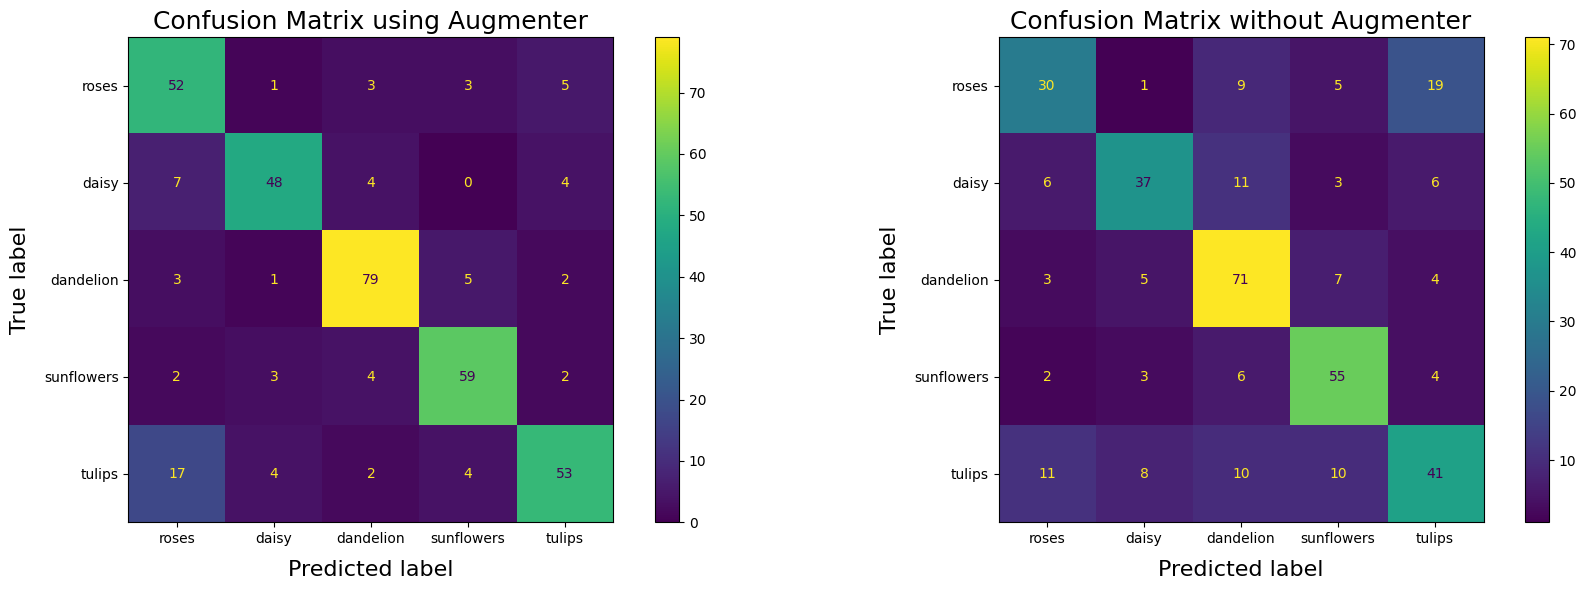

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

display_cm2.plot(ax=axes[0])
axes[0].set_xlabel('Predicted label', fontsize=16, labelpad=10)
axes[0].set_ylabel('True label', fontsize=16, labelpad=10)
axes[0].set_title('Confusion Matrix using Augmenter', fontsize=18)

display_cm1.plot(ax=axes[1])
axes[1].set_xlabel('Predicted label', fontsize=16, labelpad=10)
axes[1].set_ylabel('True label', fontsize=16, labelpad=10)
axes[1].set_title('Confusion Matrix without Augmenter', fontsize=18)

plt.tight_layout()
plt.show()

- The left confusion matrix (with augmentation) shows better classification performance.
- The right confusion matrix (without augmentation) has more misclassifications, particularly for classes like roses and tulips, where more predictions are spread across incorrect classes.
- With augmentation, the classifier correctly predicts more instances per class, leading to a higher diagonal dominance (correct classifications).

In [ ]:
print(cr_2)
print('-'*100)
print(cr_1)

              precision    recall  f1-score   support

           0       0.64      0.81      0.72        64
           1       0.84      0.76      0.80        63
           2       0.86      0.88      0.87        90
           3       0.83      0.84      0.84        70
           4       0.80      0.66      0.73        80

    accuracy                           0.79       367
   macro avg       0.80      0.79      0.79       367
weighted avg       0.80      0.79      0.79       367

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.58      0.47      0.52        64
           1       0.69      0.59      0.63        63
           2       0.66      0.79      0.72        90
           3       0.69      0.79      0.73        70
           4       0.55      0.51      0.53        80

    accuracy                           0.64       367
   macro avg       0.63      0

- The first classification report shows better performance metrics (precision, recall, F1-score) across all classes.
- The accuracy in the first report is 79%, while in the second report, it drops to 64%.
- The macro and weighted averages are also significantly higher in the first case.